In [1]:
import pandas as pd
import numpy as np
import matplotlib. pyplot as plt
plt. style.use('default')
import os
import keras
import cv2
import tensorflow as tf
from tensorflow. keras.applications import ResNet50V2
from tensorflow. keras. preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow. keras.layers import *
from tensorflow. keras.utils import plot_model
from tensorflow. keras import layers , models, optimizers
from sklearn.model_selection import train_test_split
from tensorflow. keras.models import Sequential, Model


In [2]:
train_directory = 'C:/Users/18165/Downloads/archive (3)/train/'
test_directory = 'C:/Users/18165/Downloads/archive (3)/test/'

def Classes_Count( path, name):
    Classes_Dict = {}
    
    for Class in os.listdir(path):
        
        Full_Path = path + Class
        Classes_Dict[Class] = len(os.listdir(Full_Path))
        
    df = pd.DataFrame(Classes_Dict, index=[name])
    
    return df

Traindata_Count = Classes_Count(train_directory, 'Train').transpose().sort_values(by="Train", ascending=False)
Testdata_Count = Classes_Count(test_directory, 'Test').transpose().sort_values(by="Test", ascending=False)

In [3]:
Traindata_Count

,Train
happy,7215
neutral,4965
sad,4830
fear,4097
angry,3993
surprise,3171
disgust,436


In [4]:
Testdata_Count

,Test
happy,1774
sad,1247
neutral,1233
fear,1024
angry,958
surprise,831
disgust,111


In [5]:
pd.concat([Traindata_Count,Testdata_Count] , axis=1)
         

,Train,Test
happy,7215,1774
neutral,4965,1233
sad,4830,1247
fear,4097,1024
angry,3993,958
surprise,3171,831
disgust,436,111


<Axes: >

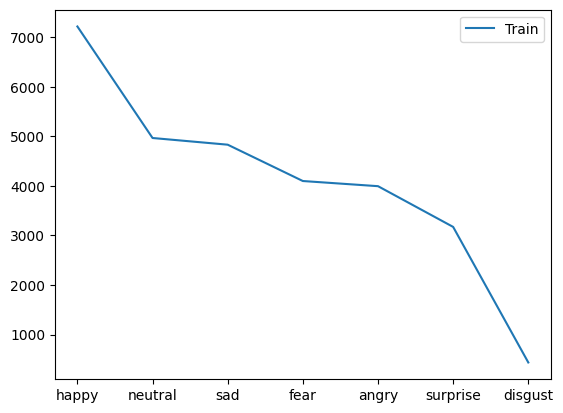

In [6]:
Traindata_Count.plot(kind='line')


<Axes: >

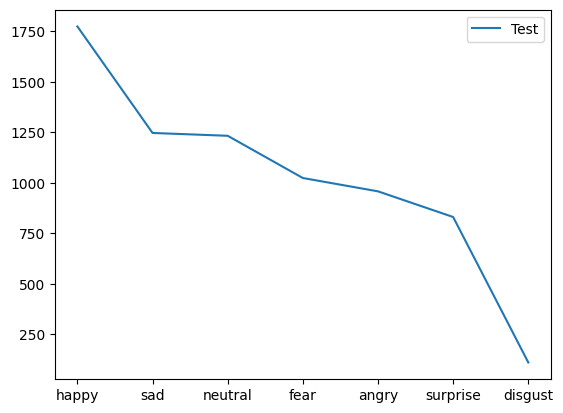

In [7]:
Testdata_Count.plot(kind='line')

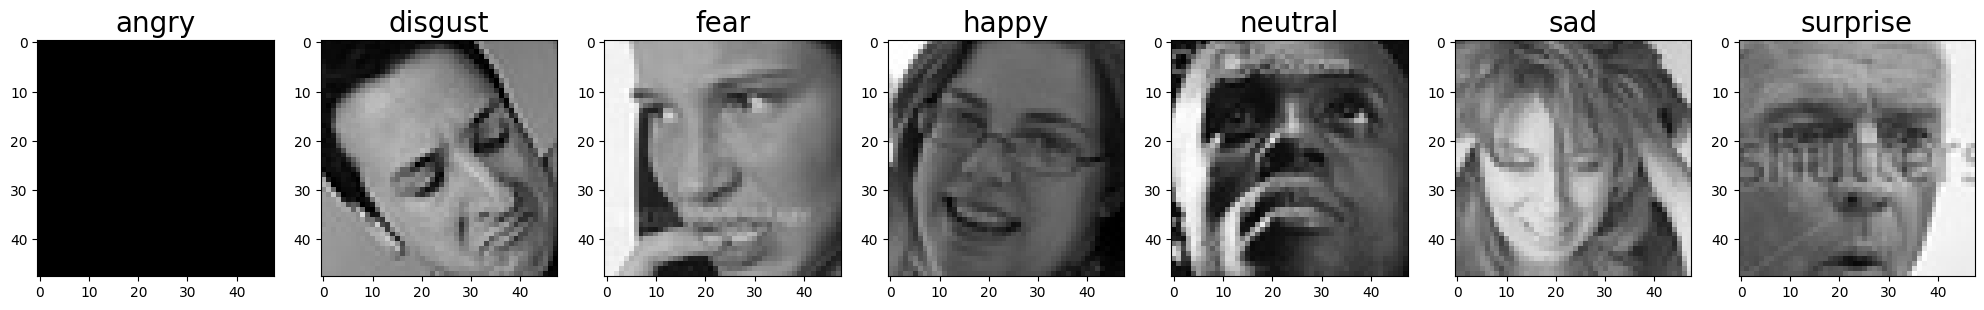

In [8]:
plt.style.use('default')
plt.figure(figsize = (25, 8))
image_count = 1
BASE_pathlocation = 'C:/Users/18165/Downloads/archive (3)/train/'

for directory in os.listdir(BASE_pathlocation):
    if directory[0] != '.':
        for i, file in enumerate(os.listdir(BASE_pathlocation + directory)):
            if i == 1:
                break
            else:
                fig = plt.subplot(2, 7, image_count)
                image_count += 1
                image = cv2.imread(BASE_pathlocation + directory + '/' + file)
                plt.imshow(image)
                plt.title(directory, fontsize = 20)

In [9]:
img_shape = 48
batch_size = 64
traindataurl = 'C:/Users/18165/Downloads/archive (3)/train/'
testdataurl= 'C:/Users/18165/Downloads/archive (3)/test/'

In [10]:
train_preprocessor = ImageDataGenerator(
        rescale = 1 / 255.,
        rotation_range=10,
        zoom_range=0.2,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,                                        
        fill_mode='nearest',
    )


test_preprocessor = ImageDataGenerator(
    rescale = 1 / 255.,
)

train_data = train_preprocessor.flow_from_directory(
    traindataurl,
    class_mode="categorical",
    target_size=(img_shape,img_shape),
    color_mode='rgb', 
    shuffle=True,
    batch_size=batch_size,
    subset='training', 
)


test_data = test_preprocessor.flow_from_directory(
    testdataurl,
    class_mode="categorical",
    target_size=(img_shape,img_shape),
    color_mode="rgb",
    shuffle=False,
    batch_size=batch_size,
)

Found 28707 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [13]:
def Create_CNN_Model():
    
    modelcnn = Sequential()
    
    #CNN1
    modelcnn.add(Conv2D(32, (3,3), activation='relu', input_shape=(img_shape, img_shape,3)))
    modelcnn.add(BatchNormalization())
    modelcnn.add(Conv2D(64,(3,3), activation='relu', padding='same'))
    modelcnn.add(BatchNormalization())
    modelcnn.add(MaxPooling2D(pool_size=(2,2), padding='same'))
    modelcnn.add(Dropout(0.25))
    
    #CNN2
    modelcnn.add(Conv2D(64, (3,3), activation='relu', ))
    modelcnn.add(BatchNormalization())
    modelcnn.add(Conv2D(128,(3,3), activation='relu', padding='same'))
    modelcnn.add(BatchNormalization())
    modelcnn.add(MaxPooling2D(pool_size=(2,2), padding='same'))
    modelcnn.add(Dropout(0.25))
    
    #CNN3
    modelcnn.add(Conv2D(128, (3,3), activation='relu'))
    modelcnn.add(BatchNormalization())
    modelcnn.add(Conv2D(256,(3,3), activation='relu', padding='same'))
    modelcnn.add(BatchNormalization())
    modelcnn.add(MaxPooling2D(pool_size=(2,2), padding='same'))
    modelcnn.add(Dropout(0.25))
    
    
    #Output
    modelcnn.add(Flatten())
    
    modelcnn.add(Dense(1024, activation='relu'))
    modelcnn.add(BatchNormalization())
    modelcnn.add(Dropout(0.25))
    
    modelcnn.add(Dense(512, activation='relu'))
    modelcnn.add(BatchNormalization())
    modelcnn.add(Dropout(0.25))
    
    modelcnn.add(Dense(256, activation='relu'))
    modelcnn.add(BatchNormalization())
    modelcnn.add(Dropout(0.25))
    
    modelcnn.add(Dense(128, activation='relu'))
    modelcnn.add(BatchNormalization())
    modelcnn.add(Dropout(0.25))
    
    modelcnn.add(Dense(64, activation='relu'))
    modelcnn.add(BatchNormalization())
    modelcnn.add(Dropout(0.25))
    
    modelcnn.add(Dense(32, activation='relu'))
    modelcnn.add(BatchNormalization())
    modelcnn.add(Dropout(0.25))
    
    modelcnn.add(Dense(7,activation='softmax'))
    
    
    return modelcnn

In [14]:
CNN_Model_creation = Create_CNN_Model()

CNN_Model_creation.summary()

CNN_Model_creation.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 46, 46, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 46, 46, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 46, 46, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 23, 64)        0         
 D)                                                              
                                                     

In [13]:
# Create Callback Checkpoint
checkpoint_path = "CNN_Model_Checkpoint"

Checkpoint = ModelCheckpoint(checkpoint_path, monitor="val_accuracy", save_best_only=True)

# Create Early Stopping Callback to monitor the accuracy
Early_Stopping = EarlyStopping(monitor = 'val_accuracy', patience = 15, restore_best_weights = True, verbose=1)

# Create ReduceLROnPlateau Callback to reduce overfitting by decreasing learning rate
Reducing_LR = tf.keras.callbacks.ReduceLROnPlateau( monitor='val_loss',
                                                  factor=0.2,
                                                  patience=2,
#                                                   min_lr=0.000005,
                                                  verbose=1)

callbacks = [Early_Stopping, Reducing_LR]

steps_per_epoch = train_data.n // train_data.batch_size
validation_steps = test_data.n // test_data.batch_size

In [14]:
CNN_history = CNN_Model_creation.fit( train_data , validation_data= test_data , epochs=10, batch_size= batch_size,
                            callbacks=callbacks, steps_per_epoch= steps_per_epoch, validation_steps=validation_steps)

Epoch 1/10


448/448 [==============================] - 222s 477ms/step - loss: 2.0443 - accuracy: 0.2035 - val_loss: 1.7960 - val_accuracy: 0.2539 - lr: 0.0010
Epoch 2/10
448/448 [==============================] - 214s 477ms/step - loss: 1.8007 - accuracy: 0.2616 - val_loss: 1.7959 - val_accuracy: 0.2893 - lr: 0.0010
Epoch 3/10
448/448 [==============================] - ETA: 0s - loss: 1.6575 - accuracy: 0.3384
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
448/448 [==============================] - 230s 512ms/step - loss: 1.6575 - accuracy: 0.3384 - val_loss: 2.1653 - val_accuracy: 0.3210 - lr: 0.0010
Epoch 4/10
448/448 [==============================] - 215s 481ms/step - loss: 1.5269 - accuracy: 0.4068 - val_loss: 1.4111 - val_accuracy: 0.4523 - lr: 2.0000e-04
Epoch 5/10
448/448 [==============================] - 220s 491ms/step - loss: 1.4770 - accuracy: 0.4282 - val_loss: 1.3376 - val_accuracy: 0.4845 - lr: 2.0000e-04
Epoch 6/10
448/448 [=============

In [15]:
CNN_acuuracy = CNN_Model_creation.evaluate(test_data)

print("Test Loss: {:.5f}".format(CNN_acuuracy[0]))
print("Test Accuracy: {:.2f}%".format(CNN_acuuracy[1] * 100))

113/113 [==============================] - 23s 202ms/step - loss: 1.2162 - accuracy: 0.5330
Test Loss: 1.21621
Test Accuracy: 53.30%


In [16]:
def plot_curves(history):

    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]

    epochs = range(len(history.history["loss"]))

    plt.figure(figsize=(15,5))

    #plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label = "training_loss")
    plt.plot(epochs, val_loss, label = "val_loss")
    plt.title("Loss")
    plt.xlabel("epochs")
    plt.legend()

    #plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label = "training_accuracy")
    plt.plot(epochs, val_accuracy, label = "val_accuracy")
    plt.title("Accuracy")
    plt.xlabel("epochs")
    plt.legend()
  

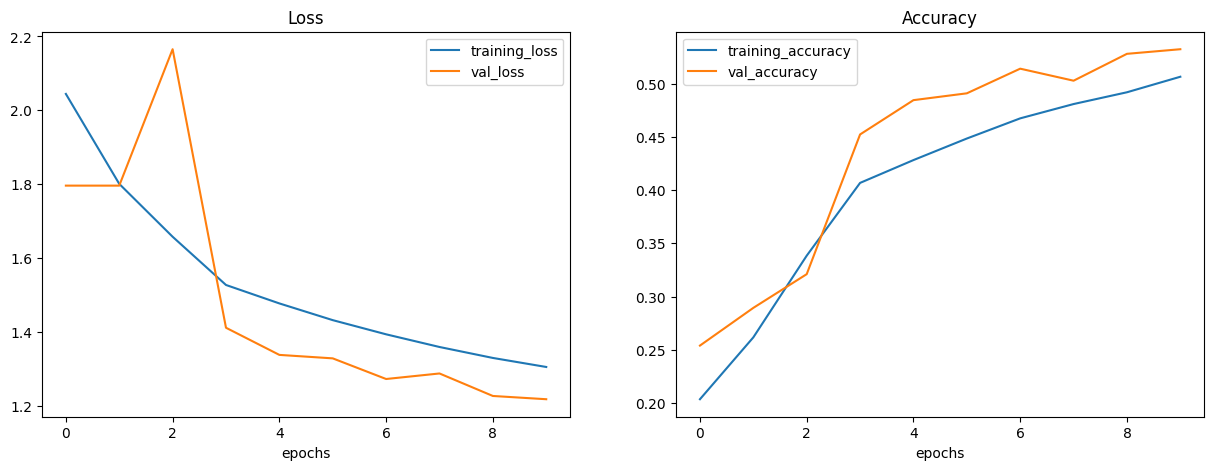

In [17]:
plot_curves(CNN_history)

In [18]:
CNN_Pred = CNN_Model_creation.predict(test_data)

# Choosing highest probalbilty class in every prediction 
CNN_Pred = np.argmax(CNN_Pred, axis=1)

113/113 [==============================] - 23s 199ms/step


Text(0.5, 1.0, 'CNN Confusion Matrix')

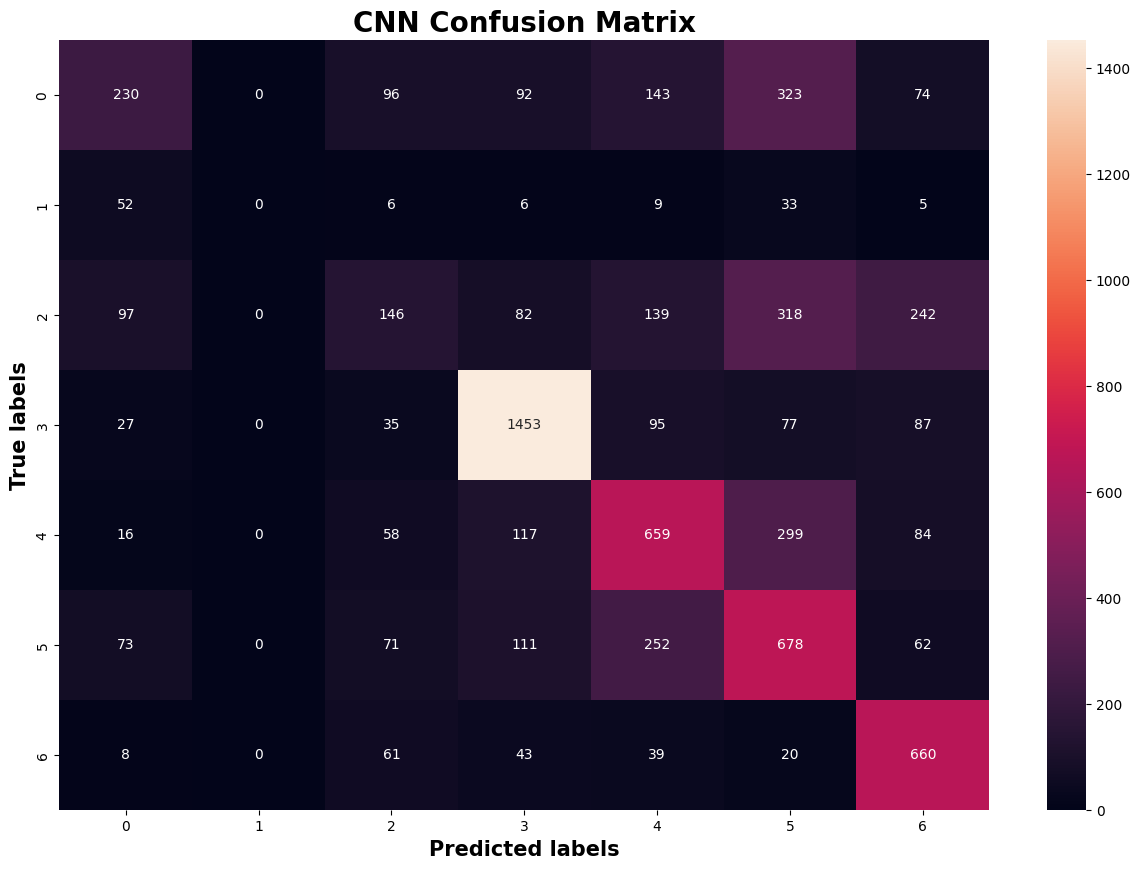

In [19]:
import seaborn as sns 
from sklearn.metrics import confusion_matrix

fig, ax= plt.subplots(figsize=(15,10))

cm=confusion_matrix(test_data.labels, CNN_Pred)

sns.heatmap(cm, annot=True, fmt='g', ax=ax)

ax.set_xlabel('Predicted labels',fontsize=15, fontweight='bold')
ax.set_ylabel('True labels', fontsize=15, fontweight='bold')
ax.set_title('CNN Confusion Matrix', fontsize=20, fontweight='bold')

In [20]:
# specifing new image shape for resnet
img_shape = 224
batch_size = 64
traindataurl = 'C:/Users/18165/Downloads/archive (3)/train/'
testdataurl= 'C:/Users/18165/Downloads/archive (3)/test/'
train_preprocessor = ImageDataGenerator(
        rescale = 1 / 255.,
        rotation_range=10,
        zoom_range=0.2,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,                                        
        fill_mode='nearest',
    )


test_preprocessor = ImageDataGenerator(
    rescale = 1 / 255.,
)

train_data = train_preprocessor.flow_from_directory(
    traindataurl,
    class_mode="categorical",
    target_size=(img_shape,img_shape),
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size,
    subset='training', 
)

test_data = test_preprocessor.flow_from_directory(
    testdataurl,
    class_mode="categorical",
    target_size=(img_shape,img_shape),
    color_mode="rgb",
    shuffle=False,
    batch_size=batch_size,
)

Found 28707 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [21]:
ModelResNet50V2 = tf.keras.applications.ResNet50V2(input_shape=(224, 224, 3),
                                               include_top= False,
                                               weights='imagenet'
                                               )


ModelResNet50V2.trainable = True

for layer in ModelResNet50V2.layers[:-50]:
    layer.trainable = False
def Create_ResNet50V2_Model():

    model = Sequential([
                      ModelResNet50V2,
                      Dropout(.25),
                      BatchNormalization(),
                      Flatten(),
                      Dense(64, activation='relu'),
                      BatchNormalization(),
                      Dropout(.5),
                      Dense(7,activation='softmax')
                    ])
    return model
ResNet50V2_Model = Create_ResNet50V2_Model()

ResNet50V2_Model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 dropout_9 (Dropout)         (None, 7, 7, 2048)        0         
                                                                 
 batch_normalization_12 (Ba  (None, 7, 7, 2048)        8192      
 tchNormalization)                                               
                                                                 
 flatten_1 (Flatten)         (None, 100352)            0         
                                                                 
 dense_7 (Dense)             (None, 64)                6422592   
                                                                 
 batch_normalization_13 (Ba  (None, 64)                256       
 tchNormalization)                                    

Epoch 1/4
448/448 [==============================] - 3214s 7s/step - loss: 1.4561 - accuracy: 0.4868 - val_loss: 1.8219 - val_accuracy: 0.5718 - lr: 0.0010
Epoch 2/4
448/448 [==============================] - 2514s 6s/step - loss: 1.1783 - accuracy: 0.5719 - val_loss: 1.0895 - val_accuracy: 0.5996 - lr: 0.0010
Epoch 3/4
448/448 [==============================] - 2512s 6s/step - loss: 1.1253 - accuracy: 0.5925 - val_loss: 1.4714 - val_accuracy: 0.5812 - lr: 0.0010
Epoch 4/4
113/113 [==============================] - 350s 3s/step - loss: 1.0200 - accuracy: 0.6227
Test Loss: 1.02001
Test Accuracy: 62.27%
113/113 [==============================] - 350s 3s/step


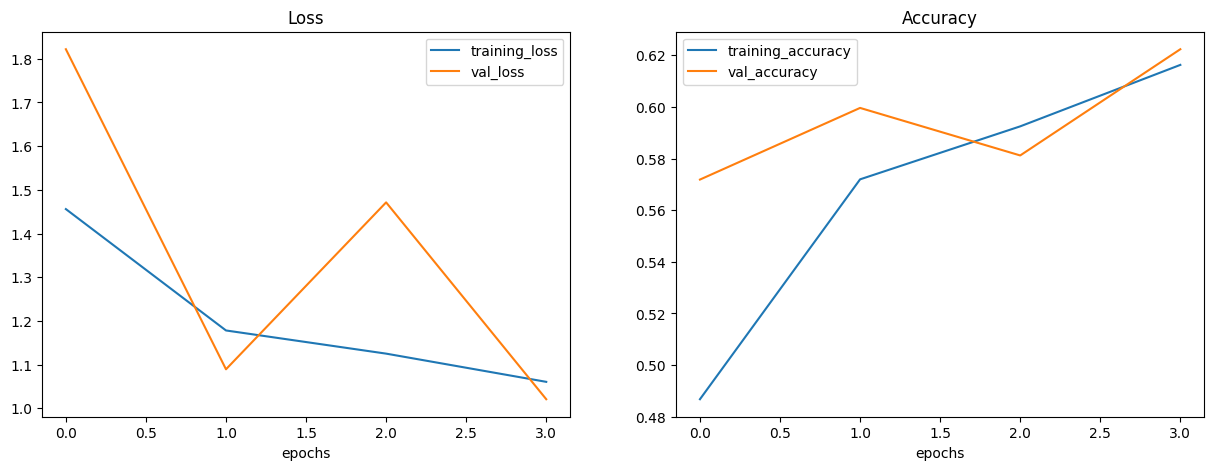

In [22]:
ResNet50V2_Model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Create Callback Checkpoint
checkpoint_path = "ResNet50V2_Model_Checkpoint"

Checkpoint = ModelCheckpoint(checkpoint_path, monitor="val_accuracy", save_best_only=True)

# Create Early Stopping Callback to monitor the accuracy
Early_Stopping = EarlyStopping(monitor = 'val_accuracy', patience = 7, restore_best_weights = True, verbose=1)

# Create ReduceLROnPlateau Callback to reduce overfitting by decreasing learning
Reducing_LR = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                  factor=0.2,
                                                  patience=2,
#                                                   min_lr=0.00005,
                                                  verbose=1)

callbacks = [Early_Stopping, Reducing_LR]

steps_per_epoch = train_data.n // train_data.batch_size
validation_steps = test_data.n // test_data.batch_size
ResNet50V2_history = ResNet50V2_Model.fit(train_data ,validation_data = test_data , epochs=4, batch_size=batch_size,
                                         callbacks = callbacks, steps_per_epoch=steps_per_epoch, validation_steps=validation_steps)
ResNet50V2_Score = ResNet50V2_Model.evaluate(test_data)

print("Test Loss: {:.5f}".format(ResNet50V2_Score[0]))
print("Test Accuracy: {:.2f}%".format(ResNet50V2_Score[1] * 100))
plot_curves(ResNet50V2_history)
ResNet50V2_Predictions = ResNet50V2_Model.predict(test_data)

# Choosing highest probalbilty class in every prediction 
ResNet50V2_Predictions = np.argmax(ResNet50V2_Predictions, axis=1)

Text(0, 0.5, 'Learning Rate')

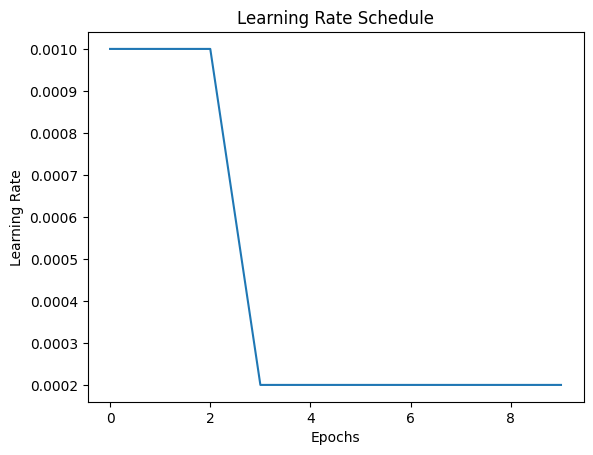

In [25]:
lr_history = CNN_history.history['lr']
plt.plot(lr_history)
plt.title('Learning Rate Schedule')
plt.xlabel('Epochs')
plt.ylabel('Learning Rate')


Text(0, 0.5, 'Frequency')

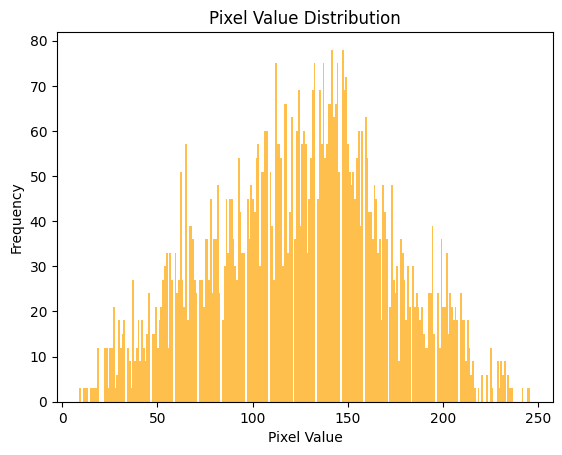

In [26]:
img = cv2.imread("C:/Users/18165/Downloads/archive (3)/test/neutral/PrivateTest_59059.jpg")
plt.hist(img.ravel(), bins=256, color='orange', alpha=0.7)
plt.title('Pixel Value Distribution')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')


1/1 [==============================] - 0s 214ms/step


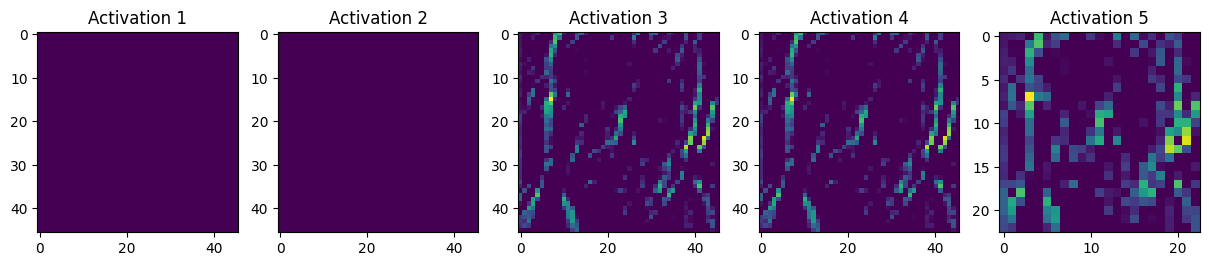

In [27]:
layer_outputs = [layer.output for layer in CNN_Model_creation.layers[:5]]  # Choose layers to visualize
activation_model = Model(inputs=CNN_Model_creation.input, outputs=layer_outputs)
activations = activation_model.predict(np.expand_dims(img, axis=0))

plt.figure(figsize=(15, 6))
for i in range(len(activations)):
    plt.subplot(1, len(activations), i+1)
    plt.imshow(activations[i][0, :, :, 0], cmap='viridis')
    plt.title(f'Activation {i+1}')


In [28]:
Classes_emotion = ['Angry', 
                  'Disgust', 
                  'Fear', 
                  'Happy', 
                  'Neutral', 
                  'Sad', 
                  'Surprise']

In [29]:
# Shuffling Test Data to show diffrent classes
test_preprocessor = ImageDataGenerator(
        rescale = 1 / 255.,
    )

test_generator = test_preprocessor.flow_from_directory(
    traindataurl,
    class_mode="categorical",
    target_size=(img_shape,img_shape),
    color_mode="rgb",
    shuffle=True,
    batch_size=batch_size,
)

Found 28707 images belonging to 7 classes.


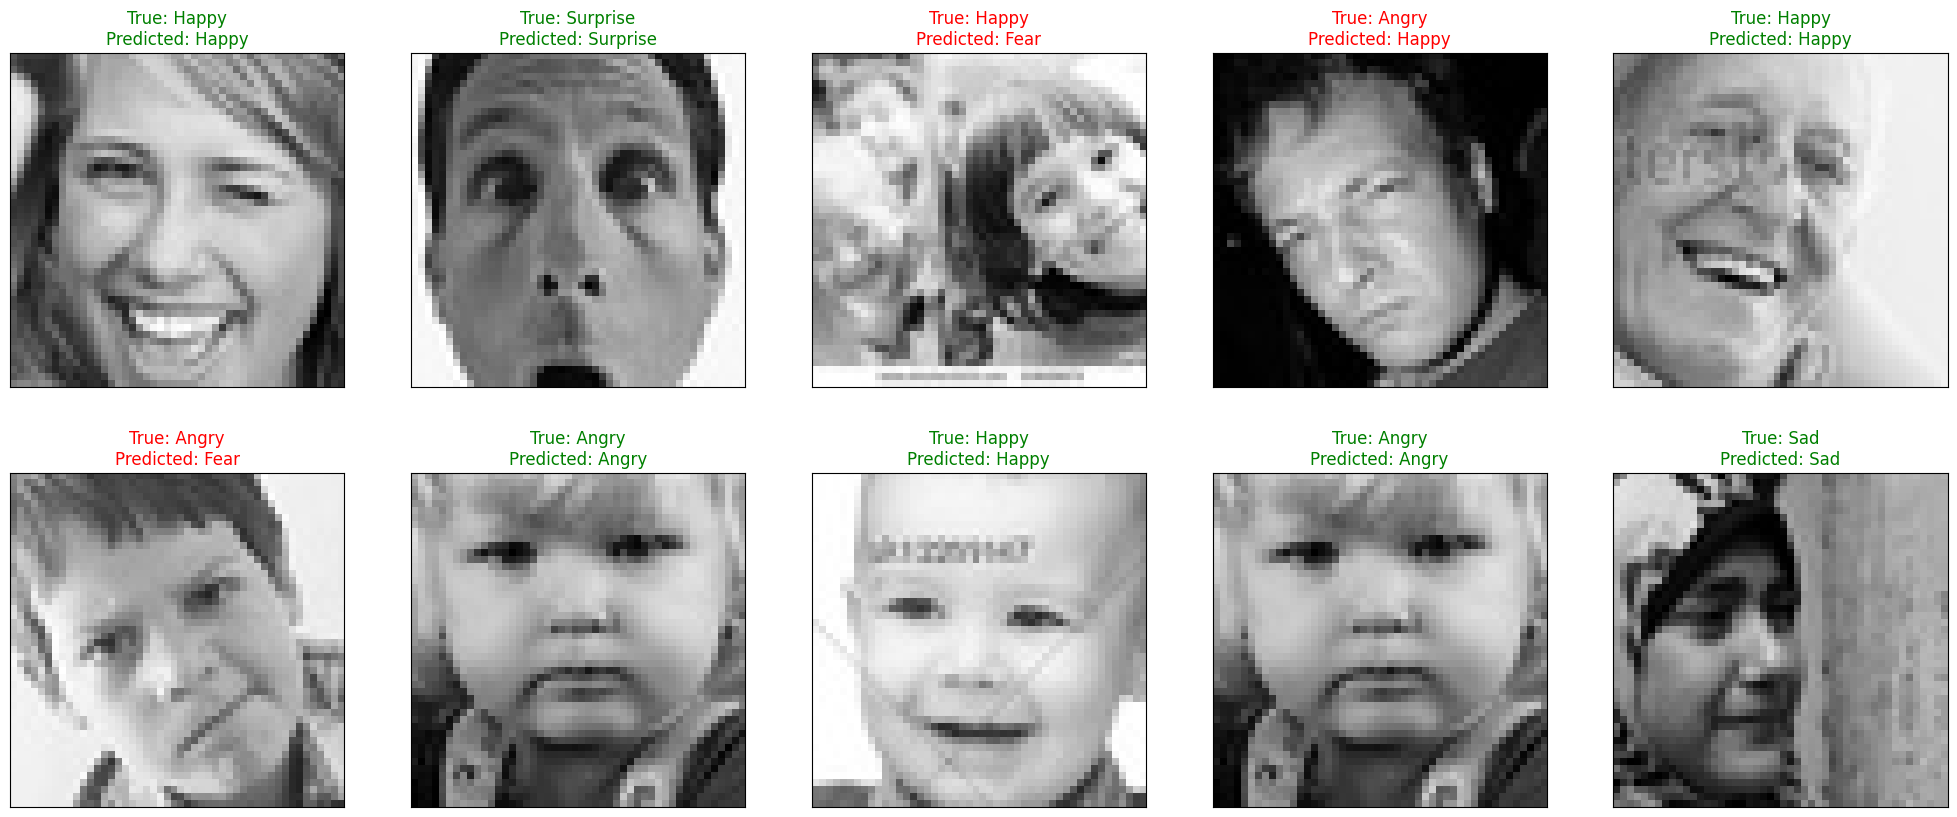

<Figure size 640x480 with 0 Axes>

In [63]:
# Display 10 random pictures from the dataset with their labels

Random_batch = np.random.randint(0, len(test_generator) - 1)

Random_Img_Index = np.random.randint(0, batch_size - 1 , 10)

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(25, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):

    Random_Img = test_generator[Random_batch][0][Random_Img_Index[i]]
    Random_Img = cv2.resize(Random_Img, (48, 48))

    Random_Img_Label = np.argmax(test_generator[Random_batch][1][Random_Img_Index[i]])

    Model_Prediction = np.argmax(CNN_Model_creation.predict( tf.expand_dims(Random_Img, axis=0) , verbose=0))

    ax.imshow(Random_Img)

    if Classes_emotion[Random_Img_Label] == Classes_emotion[Model_Prediction]:
          color = "green"
    else:
          color = "red"
    ax.set_title(f"True: {Classes_emotion[Random_Img_Label]}\nPredicted: {Classes_emotion[Model_Prediction]}", color=color)
plt.show()
plt.tight_layout()

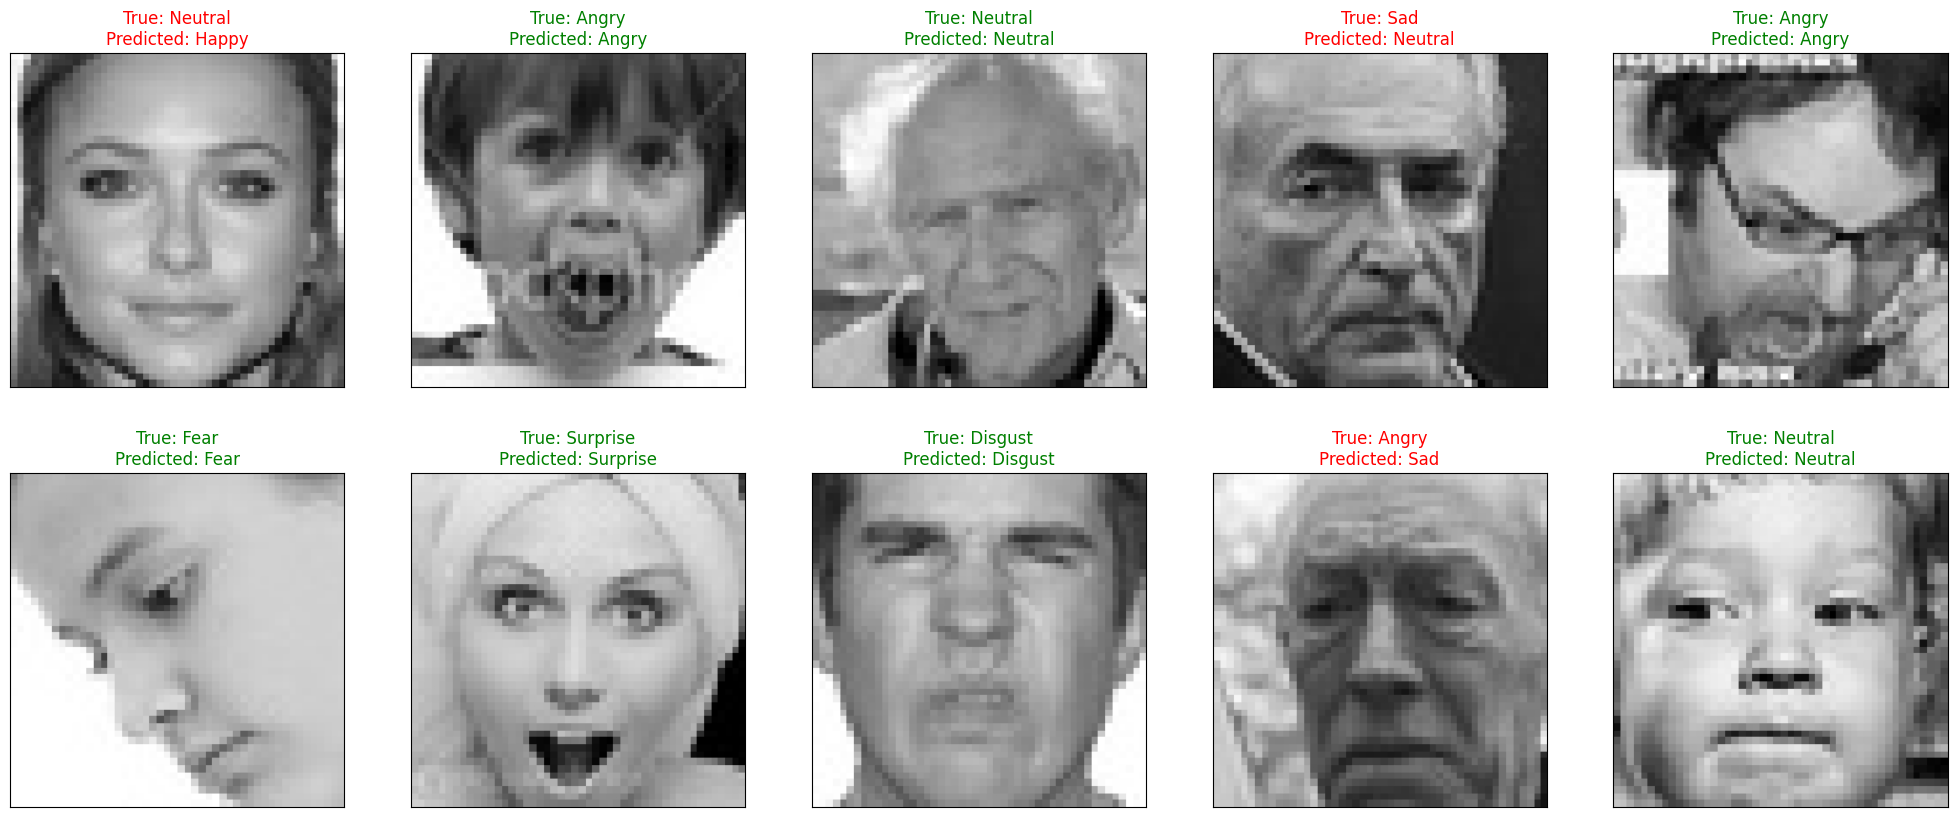

<Figure size 640x480 with 0 Axes>

In [31]:
Random_batch = np.random.randint(0, len(test_generator) - 1)

Random_Img_Index = np.random.randint(0, batch_size - 1 , 10)

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(25, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):

    Random_Img = test_generator[Random_batch][0][Random_Img_Index[i]]

    Random_Img_Label = np.argmax(test_generator[Random_batch][1][Random_Img_Index[i]])

    Model_Prediction = np.argmax(ResNet50V2_Model.predict( tf.expand_dims(Random_Img, axis=0) , verbose=0))

    ax.imshow(Random_Img)

    if Classes_emotion[Random_Img_Label] == Classes_emotion[Model_Prediction]:
          color = "green"
    else:
          color = "red"
    ax.set_title(f"True: {Classes_emotion[Random_Img_Label]}\nPredicted: {Classes_emotion[Model_Prediction]}", color=color)
plt.show()
plt.tight_layout()

Text(0, 0.5, 'Number of Images')

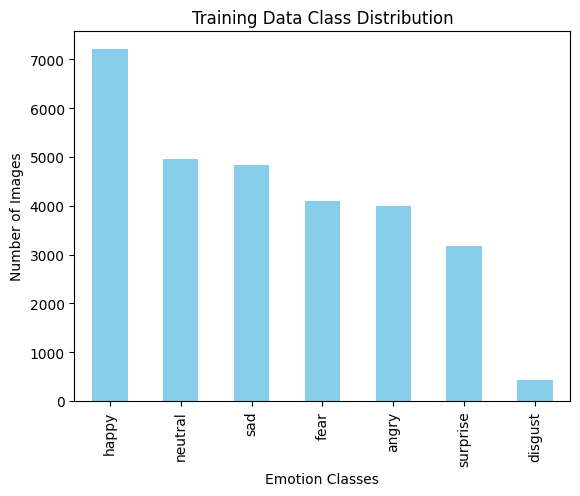

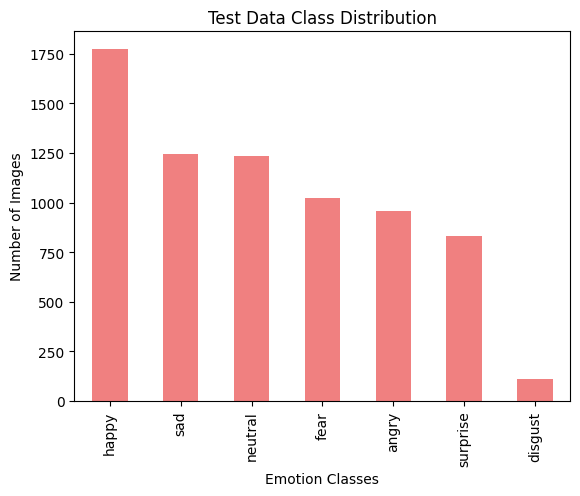

In [33]:
Traindata_Count.plot(kind='bar', legend=False, color='skyblue')
plt.title('Training Data Class Distribution')
plt.xlabel('Emotion Classes')
plt.ylabel('Number of Images')

Testdata_Count.plot(kind='bar', legend=False, color='lightcoral')
plt.title('Test Data Class Distribution')
plt.xlabel('Emotion Classes')
plt.ylabel('Number of Images')

In [34]:
Musicdata = pd.read_csv("C:/Users/18165/Downloads/archive (1) (1)/data_moods.csv")

In [35]:
Musicdata = Musicdata[['name','artist','mood','popularity', 'release_date', 'album']]

In [36]:
Musicdata.head()

,name,artist,mood,popularity,release_date,album
0,1999,Prince,Happy,68,1982-10-27,1999
1,23,Blonde Redhead,Sad,43,2007-04-16,23
2,9 Crimes,Damien Rice,Sad,60,2006-11-06,9
3,99 Luftballons,Nena,Happy,2,1984-08-21,99 Luftballons
4,A Boy Brushed Red Living In Black And White,Underoath,Energetic,60,2004-01-01,They're Only Chasing Safety


In [37]:
Musicdata["mood"].value_counts()

mood
Sad          197
Calm         195
Energetic    154
Happy        140
Name: count, dtype: int64

In [38]:
Musicdata["popularity"].value_counts()

popularity
0     92
51    23
52    22
50    21
55    21
      ..
80     1
2      1
14     1
15     1
88     1
Name: count, Length: 83, dtype: int64

In [39]:
Musicdata["name"].value_counts()

name
1999                                                       1
Sadness                                                    1
River                                                      1
Riverside                                                  1
Rocket Man (I Think It's Going To Be A Long, Long Time)    1
                                                          ..
Harvest Love                                               1
Hash Pipe                                                  1
Heaven - David Guetta & MORTEN Remix                       1
Heavenly                                                   1
æfre                                                       1
Name: count, Length: 686, dtype: int64

In [40]:
Musicdata["release_date"].value_counts()

release_date
2020-05-01    8
2020-04-24    8
2019-12-13    6
2020-06-05    6
2020-07-31    6
             ..
2018-02-10    1
2005-04-19    1
2011-06-14    1
2011          1
2019-05-03    1
Name: count, Length: 450, dtype: int64

In [41]:
Musicplay = Musicdata[Musicdata['mood'] =='Calm' ]
Musicplay = Musicplay.sort_values(by="popularity", ascending=False)
Musicplay = Musicplay[:5].reset_index(drop=True)
display(Musicplay)

,name,artist,mood,popularity,release_date,album
0,Lost,Annelie,Calm,64,2020-06-05,Lost
1,Curiosity,Beau Projet,Calm,60,2019-03-21,Curiosity
2,Escaping Time,Benjamin Martins,Calm,60,2019-10-21,Floating
3,Just Look at You,369,Calm,59,2020-02-21,432 Water Crystals
4,Vague,Amaranth Cove,Calm,59,2020-01-03,Envision


In [42]:
def Recommend_Songs(pred_class):
    
    if( pred_class=='Disgust' ):

        Musicplay = Musicdata[Musicdata['mood'] =='Sad' ]
        Musicplay = Musicplay.sort_values(by="popularity", ascending=False)
        Musicplay = Musicplay[:5].reset_index(drop=True)
        display(Musicplay)

    if( pred_class=='Happy' or pred_class=='Sad' ):

        Musicplay = Musicdata[Musicdata['mood'] =='Happy' ]
        Musicplay = Musicplay.sort_values(by="popularity", ascending=False)
        Musicplay = Musicplay[:5].reset_index(drop=True)
        display(Musicplay)

    if( pred_class=='Fear' or pred_class=='Angry' ):

        Musicplay = Musicdata[Musicdata['mood'] =='Calm' ]
        Musicplay = Musicplay.sort_values(by="popularity", ascending=False)
        Musicplay = Musicplay[:5].reset_index(drop=True)
        display(Musicplay)

    if( pred_class=='Surprise' or pred_class=='Neutral' ):

        Musicplay = Musicdata[Musicdata['mood'] =='Energetic' ]
        Musicplay = Musicplay.sort_values(by="popularity", ascending=False)
        Musicplay = Musicplay[:5].reset_index(drop=True)
        display(Musicplay)
Cascadeoffacial = cv2.CascadeClassifier("C:/Users/18165/Downloads/haarcascade_frontalface_default.xml")

In [46]:
def imageloadandprep(filename, img_shape = (48,48)):

    img = cv2.imread(filename)

    GrayImg = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    
    faces = Cascadeoffacial.detectMultiScale(GrayImg, 1.1, 4)
    
    for x,y,w,h in faces:
        
        roi_GrayImg = GrayImg[ y: y + h , x: x + w ]
        roi_Img = img[ y: y + h , x: x + w ]
        
        cv2.rectangle(img, (x,y), (x+w, y+h), (0, 255, 0), 2)
        
        plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
        
        faces = Cascadeoffacial.detectMultiScale(roi_Img, 1.1, 4)
        
        if len(faces) == 0:
            print("No Faces Detected")
        else:
            for (ex, ey, ew, eh) in faces:
                img = roi_Img[ ey: ey+eh , ex: ex+ew ]
    
    RGBImg = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    
    RGBImg= cv2.resize(RGBImg,img_shape)

    
    RGBImg = RGBImg/255.

    return RGBImg


In [67]:
def plotandprediction(filename, class_names):

    img = imageloadandprep(filename,img_shape = (48,48))

    # Make a prediction
    CNN_Model_pred = CNN_Model_creation.predict(np.expand_dims(img, axis=0))

    predictedclass = class_names[CNN_Model_pred.argmax()]

    
    plt.title(f"Prediction: {predictedclass}")
    plt.axis(False);
    
    Recommend_Songs(predictedclass)


In [68]:
def plotandpredictionresnet(filename, class_names):

    img = imageloadandprep(filename,img_shape = (224,224))

    # Make a prediction
    ResNet_Model_pred = ResNet50V2_Model.predict(np.expand_dims(img, axis=0))

    predictedclass = class_names[ResNet_Model_pred.argmax()]

    
    plt.title(f"Prediction: {predictedclass}")
    plt.axis(False);
    
    Recommend_Songs(predictedclass)

No Faces Detected
1/1 [==============================] - 0s 76ms/step


,name,artist,mood,popularity,release_date,album
0,Chop Suey!,System Of A Down,Energetic,79,2001-09-04,Toxicity
1,Killing In The Name,Rage Against The Machine,Energetic,78,1992,Rage Against The Machine - XX (20th Anniversar...
2,Dani California,Red Hot Chili Peppers,Energetic,77,2006-05-09,Stadium Arcadium
3,Duality,Slipknot,Energetic,76,2004,Vol. 3: The Subliminal Verses
4,Uprising,Muse,Energetic,75,2009-09-10,The Resistance


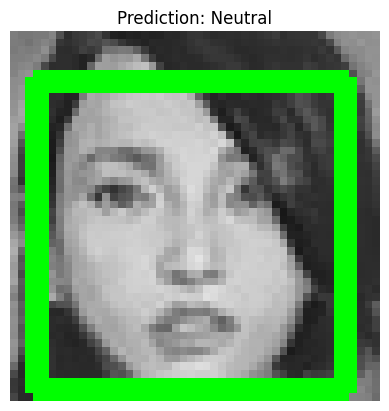

In [55]:
plotandprediction("C:/Users/18165/Downloads/archive (3)/test/neutral/PrivateTest_96698514.jpg", Classes_emotion) 



No Faces Detected
1/1 [==============================] - 0s 88ms/step


,name,artist,mood,popularity,release_date,album
0,Pumped Up Kicks,Foster The People,Happy,84,2011-05-23,Torches
1,Africa,TOTO,Happy,84,1982-04-08,Toto IV
2,Take on Me,a-ha,Happy,84,1985-06-01,Hunting High and Low
3,Highway to Hell,AC/DC,Happy,83,1979-07-27,Highway to Hell
4,Here Comes The Sun - Remastered 2009,The Beatles,Happy,83,1969-09-26,Abbey Road (Remastered)


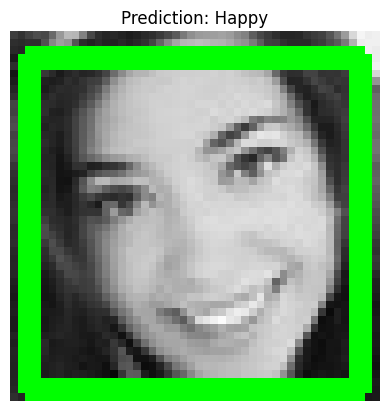

In [59]:
plotandprediction("C:/Users/18165/Downloads/archive (3)/test/happy/PrivateTest_50671595.jpg", Classes_emotion) 


No Faces Detected
1/1 [==============================] - 0s 298ms/step


,name,artist,mood,popularity,release_date,album
0,Chop Suey!,System Of A Down,Energetic,79,2001-09-04,Toxicity
1,Killing In The Name,Rage Against The Machine,Energetic,78,1992,Rage Against The Machine - XX (20th Anniversar...
2,Dani California,Red Hot Chili Peppers,Energetic,77,2006-05-09,Stadium Arcadium
3,Duality,Slipknot,Energetic,76,2004,Vol. 3: The Subliminal Verses
4,Uprising,Muse,Energetic,75,2009-09-10,The Resistance


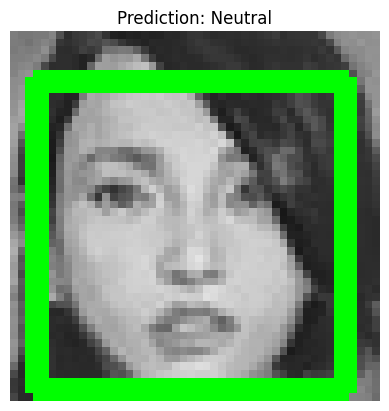

In [69]:
plotandpredictionresnet("C:/Users/18165/Downloads/archive (3)/test/neutral/PrivateTest_96698514.jpg", Classes_emotion)